# 本程序及代码是在人工智能工具 ChatGPT (GPT-5，OpenAI，2025年3月) 辅助下完成的


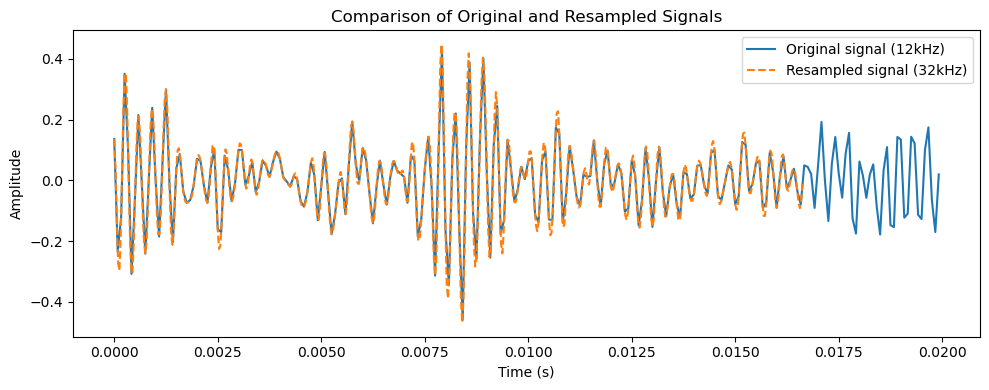

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

orig_path = "../data/0csv无处理/12kHz_FE_data/B/0014/B014_2.csv"
resampled_path = "../data/1csv_32k/12kHz_FE_data/B/0014/B014_2.csv"

orig = pd.read_csv(orig_path).iloc[:,0].values
resampled = pd.read_csv(resampled_path).iloc[:,0].values

sr_orig = 12000
sr_new  = 32000
t_orig = [i/sr_orig for i in range(len(orig))]
t_new  = [i/sr_new for i in range(len(resampled))]

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(t_orig[:240], orig[:240], label="Original signal (12kHz)")
ax.plot(t_new[:533], resampled[:533], '--', label="Resampled signal (32kHz)")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Comparison of Original and Resampled Signals")
ax.legend()

fig.tight_layout()
plt.show()


## 质检与可视化 + 数据平衡检查

=== 数据平衡性统计 ===
label
OR    7640
B     4171
IR    4162
N      450
Name: count, dtype: int64


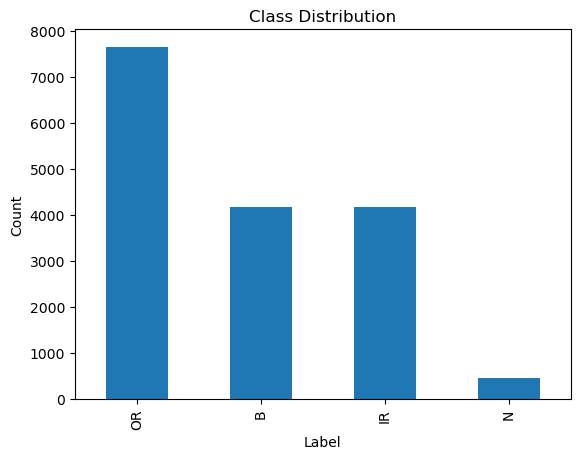

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import hilbert
from scipy.fft import fft, fftfreq

# 参数
SEGMENTS_PARQUET = Path("../第1问/1segments.parquet")
fs = 32000       # 采样率
n_show = 3       # 随机抽样可视化的段数

# 1. 读取索引 & 检查数据类别平衡
df = pd.read_parquet(SEGMENTS_PARQUET)
print("=== 数据平衡性统计 ===")
print(df["label"].value_counts())

df["label"].value_counts().plot(kind="bar", title="Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# 2. 随机抽样并做可视化
samples = df.sample(n=min(n_show, len(df)), random_state=42)

for _, row in samples.iterrows():
    seg_file = Path(row["seg_file"])
    if not seg_file.exists():
        continue

    x = np.load(seg_file)

    # 时域波形
    t = np.arange(len(x)) / fs
    plt.figure(figsize=(12, 4))
    plt.plot(t, x, lw=0.8)
    plt.title(f"Time Waveform - Label={row['label']} seg={row['seg_idx']}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

    # 频谱（仅显示低频部分）
    X = np.abs(fft(x))
    freqs = fftfreq(len(x), 1/fs)
    mask = freqs >= 0
    plt.figure(figsize=(12, 4))
    plt.plot(freqs[mask], X[mask])
    plt.title(f"Spectrum - Label={row['label']} seg={row['seg_idx']}")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.xlim(0, 5000)
    plt.show()

    # 包络谱（重点看低频）
    analytic = hilbert(x)
    env = np.abs(analytic)
    E = np.abs(fft(env))
    freqs = fftfreq(len(env), 1/fs)
    mask = freqs >= 0
    plt.figure(figsize=(12, 4))
    plt.plot(freqs[mask], E[mask])
    plt.title(f"Envelope Spectrum - Label={row['label']} seg={row['seg_idx']}")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.xlim(0, 2000)
    plt.show()
